## GBM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [2]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [3]:
pd.options.display.max_rows = 999
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df['dup_cnt'] > 0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
321,322,"fBodyAcc-bandsEnergy()-41,48_1",1
322,323,"fBodyAcc-bandsEnergy()-49,56_1",1
323,324,"fBodyAcc-bandsEnergy()-57,64_1",1
324,325,"fBodyAcc-bandsEnergy()-1,16_1",1
325,326,"fBodyAcc-bandsEnergy()-17,32_1",1


In [4]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

## XGboost

In [ ]:
# conda install -c anaconda py-xgboost

In [1]:
import xgboost

print(xgboost.__version__)

1.3.3


In [7]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [13]:
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [15]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [10]:
get_clf_eval(y_test , w_preds)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9665


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

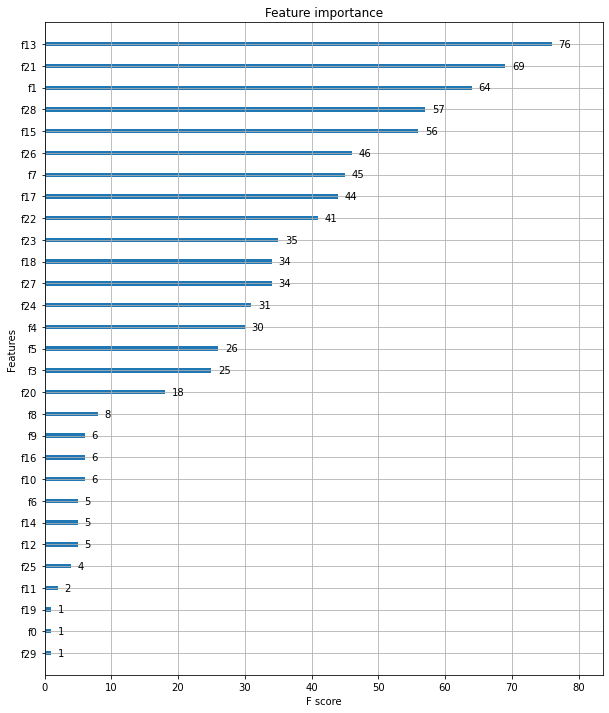

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)

## LGBM

In [ ]:
# conda install -c conda-forge lightgbm

In [16]:
import lightgbm

print(lightgbm.__version__)

3.1.1


In [17]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [18]:
get_clf_eval(y_test, preds)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9395


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

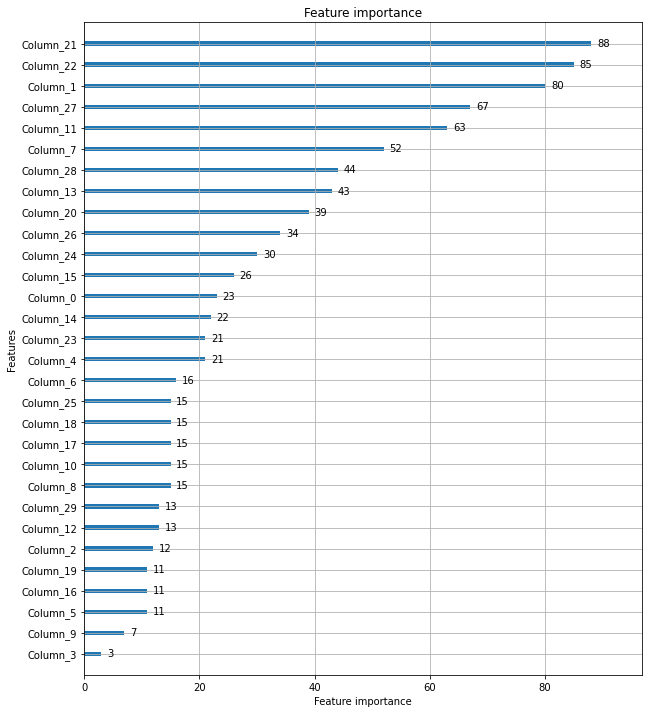

In [21]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## 하이퍼파라미터 튜닝

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_customer.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [24]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [25]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [26]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [27]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [28]:
X_train, X_val, y_train, y_val = train_val_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
val_cnt = y_val.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_val.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_val.value_counts()/val_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [30]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_val, y_val)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_val, gridcv.predict_proba(X_val)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.80038	validation_1-auc:0.79818
[1]	validation_0-auc:0.81995	validation_1-auc:0.81649
[2]	validation_0-auc:0.82649	validation_1-auc:0.82081
[3]	validation_0-auc:0.83183	validation_1-auc:0.82450
[4]	validation_0-auc:0.83650	validation_1-auc:0.82830
[5]	validation_0-auc:0.83943	validation_1-auc:0.83588
[6]	validation_0-auc:0.83793	validation_1-auc:0.83169
[7]	validation_0-auc:0.84466	validation_1-auc:0.83748
[8]	validation_0-auc:0.84785	validation_1-auc:0.83735
[9]	validation_0-auc:0.84684	validation_1-auc:0.83529
[10]	validation_0-auc:0.84625	validation_1-auc:0.83278
[11]	validation_0-auc:0.84769	validation_1-auc:0.83157
[12]	validation_0-auc:0.85326	validation_1-auc:0.83573
[13]	validation_0-auc:0.85730	validation_1-auc:0.83839
[14]	validation_0-auc:0.85934	validation_1-auc:0.83892
[15]	validation_0-auc:0.86089	validation_1-auc:0.83844
[16]	validation_0-auc:0.86256	validation_1-auc:0.83932
[17]	validation_0-auc:0.86398	validation_1-auc:0.83871
[18]	validation_0-au

[16]	validation_0-auc:0.86438	validation_1-auc:0.84129
[17]	validation_0-auc:0.86582	validation_1-auc:0.84054
[18]	validation_0-auc:0.86660	validation_1-auc:0.84019
[19]	validation_0-auc:0.86816	validation_1-auc:0.83925
[20]	validation_0-auc:0.86872	validation_1-auc:0.83902
[21]	validation_0-auc:0.86926	validation_1-auc:0.83853
[22]	validation_0-auc:0.87020	validation_1-auc:0.83887
[23]	validation_0-auc:0.87138	validation_1-auc:0.83898
[24]	validation_0-auc:0.87192	validation_1-auc:0.83943
[25]	validation_0-auc:0.87267	validation_1-auc:0.83958
[26]	validation_0-auc:0.87390	validation_1-auc:0.83941
[27]	validation_0-auc:0.87466	validation_1-auc:0.83954
[28]	validation_0-auc:0.87477	validation_1-auc:0.83958
[29]	validation_0-auc:0.87518	validation_1-auc:0.83951
[30]	validation_0-auc:0.87583	validation_1-auc:0.83913
[31]	validation_0-auc:0.87665	validation_1-auc:0.83859
[32]	validation_0-auc:0.87711	validation_1-auc:0.83895
[33]	validation_0-auc:0.87737	validation_1-auc:0.83902
[34]	valid

[14]	validation_0-auc:0.85936	validation_1-auc:0.84137
[15]	validation_0-auc:0.86035	validation_1-auc:0.84141
[16]	validation_0-auc:0.86170	validation_1-auc:0.84277
[17]	validation_0-auc:0.86261	validation_1-auc:0.84241
[18]	validation_0-auc:0.86332	validation_1-auc:0.84189
[19]	validation_0-auc:0.86468	validation_1-auc:0.84155
[20]	validation_0-auc:0.86554	validation_1-auc:0.84142
[21]	validation_0-auc:0.86602	validation_1-auc:0.84093
[22]	validation_0-auc:0.86679	validation_1-auc:0.84153
[23]	validation_0-auc:0.86744	validation_1-auc:0.84176
[24]	validation_0-auc:0.86781	validation_1-auc:0.84101
[25]	validation_0-auc:0.86901	validation_1-auc:0.84009
[26]	validation_0-auc:0.87031	validation_1-auc:0.84028
[27]	validation_0-auc:0.87125	validation_1-auc:0.84040
[28]	validation_0-auc:0.87151	validation_1-auc:0.84015
[29]	validation_0-auc:0.87236	validation_1-auc:0.83980
[30]	validation_0-auc:0.87280	validation_1-auc:0.83951
[31]	validation_0-auc:0.87337	validation_1-auc:0.83966
[32]	valid

[18]	validation_0-auc:0.86406	validation_1-auc:0.84200
[19]	validation_0-auc:0.86509	validation_1-auc:0.84225
[20]	validation_0-auc:0.86583	validation_1-auc:0.84202
[21]	validation_0-auc:0.86649	validation_1-auc:0.84154
[22]	validation_0-auc:0.86789	validation_1-auc:0.84130
[23]	validation_0-auc:0.86875	validation_1-auc:0.84070
[24]	validation_0-auc:0.86963	validation_1-auc:0.84129
[25]	validation_0-auc:0.87029	validation_1-auc:0.84082
[26]	validation_0-auc:0.87152	validation_1-auc:0.83990
[27]	validation_0-auc:0.87202	validation_1-auc:0.83942
[28]	validation_0-auc:0.87225	validation_1-auc:0.83959
[29]	validation_0-auc:0.87310	validation_1-auc:0.83948
[30]	validation_0-auc:0.87336	validation_1-auc:0.83930
[31]	validation_0-auc:0.87396	validation_1-auc:0.83927
[32]	validation_0-auc:0.87499	validation_1-auc:0.83895
[33]	validation_0-auc:0.87511	validation_1-auc:0.83896
[34]	validation_0-auc:0.87595	validation_1-auc:0.83959
[35]	validation_0-auc:0.87700	validation_1-auc:0.83873
[36]	valid

[25]	validation_0-auc:0.89592	validation_1-auc:0.83930
[26]	validation_0-auc:0.89778	validation_1-auc:0.83983
[27]	validation_0-auc:0.89849	validation_1-auc:0.83885
[28]	validation_0-auc:0.89880	validation_1-auc:0.83913
[29]	validation_0-auc:0.89981	validation_1-auc:0.83865
[30]	validation_0-auc:0.90069	validation_1-auc:0.83884
[31]	validation_0-auc:0.90132	validation_1-auc:0.83787
[32]	validation_0-auc:0.90165	validation_1-auc:0.83734
[33]	validation_0-auc:0.90202	validation_1-auc:0.83749
[34]	validation_0-auc:0.90287	validation_1-auc:0.83740
[35]	validation_0-auc:0.90325	validation_1-auc:0.83765
[36]	validation_0-auc:0.90351	validation_1-auc:0.83767
[37]	validation_0-auc:0.90373	validation_1-auc:0.83737
[38]	validation_0-auc:0.90389	validation_1-auc:0.83727
[39]	validation_0-auc:0.90420	validation_1-auc:0.83715
[40]	validation_0-auc:0.90430	validation_1-auc:0.83716
[41]	validation_0-auc:0.90535	validation_1-auc:0.83669
[42]	validation_0-auc:0.90598	validation_1-auc:0.83662
[43]	valid

[40]	validation_0-auc:0.89615	validation_1-auc:0.83601
[41]	validation_0-auc:0.89623	validation_1-auc:0.83571
[42]	validation_0-auc:0.89673	validation_1-auc:0.83590
[43]	validation_0-auc:0.89700	validation_1-auc:0.83579
[44]	validation_0-auc:0.89776	validation_1-auc:0.83524
[0]	validation_0-auc:0.81707	validation_1-auc:0.81668
[1]	validation_0-auc:0.83059	validation_1-auc:0.82461
[2]	validation_0-auc:0.83731	validation_1-auc:0.82740
[3]	validation_0-auc:0.84251	validation_1-auc:0.82901
[4]	validation_0-auc:0.84709	validation_1-auc:0.82948
[5]	validation_0-auc:0.85009	validation_1-auc:0.83382
[6]	validation_0-auc:0.85057	validation_1-auc:0.82627
[7]	validation_0-auc:0.85827	validation_1-auc:0.83007
[8]	validation_0-auc:0.86455	validation_1-auc:0.83361
[9]	validation_0-auc:0.86340	validation_1-auc:0.83205
[10]	validation_0-auc:0.86263	validation_1-auc:0.83078
[11]	validation_0-auc:0.86316	validation_1-auc:0.82911
[12]	validation_0-auc:0.86958	validation_1-auc:0.83375
[13]	validation_0-au

[2]	validation_0-auc:0.84053	validation_1-auc:0.82722
[3]	validation_0-auc:0.84430	validation_1-auc:0.82981
[4]	validation_0-auc:0.84814	validation_1-auc:0.83158
[5]	validation_0-auc:0.85204	validation_1-auc:0.83567
[6]	validation_0-auc:0.85209	validation_1-auc:0.83069
[7]	validation_0-auc:0.86086	validation_1-auc:0.83681
[8]	validation_0-auc:0.86762	validation_1-auc:0.83791
[9]	validation_0-auc:0.86651	validation_1-auc:0.83835
[10]	validation_0-auc:0.86632	validation_1-auc:0.83648
[11]	validation_0-auc:0.86635	validation_1-auc:0.83540
[12]	validation_0-auc:0.87323	validation_1-auc:0.83879
[13]	validation_0-auc:0.87674	validation_1-auc:0.84000
[14]	validation_0-auc:0.87881	validation_1-auc:0.84150
[15]	validation_0-auc:0.88009	validation_1-auc:0.84063
[16]	validation_0-auc:0.88204	validation_1-auc:0.84153
[17]	validation_0-auc:0.88346	validation_1-auc:0.84109
[18]	validation_0-auc:0.88420	validation_1-auc:0.84169
[19]	validation_0-auc:0.88585	validation_1-auc:0.84125
[20]	validation_0-

[7]	validation_0-auc:0.84723	validation_1-auc:0.83554
[8]	validation_0-auc:0.84879	validation_1-auc:0.83601
[9]	validation_0-auc:0.85137	validation_1-auc:0.84014
[10]	validation_0-auc:0.85217	validation_1-auc:0.83916
[11]	validation_0-auc:0.85200	validation_1-auc:0.83724
[12]	validation_0-auc:0.85661	validation_1-auc:0.83892
[13]	validation_0-auc:0.86007	validation_1-auc:0.84146
[14]	validation_0-auc:0.86206	validation_1-auc:0.84135
[15]	validation_0-auc:0.86440	validation_1-auc:0.84157
[16]	validation_0-auc:0.86560	validation_1-auc:0.84169
[17]	validation_0-auc:0.86681	validation_1-auc:0.84139
[18]	validation_0-auc:0.86739	validation_1-auc:0.84111
[19]	validation_0-auc:0.86874	validation_1-auc:0.84064
[20]	validation_0-auc:0.86966	validation_1-auc:0.84041
[21]	validation_0-auc:0.87071	validation_1-auc:0.83990
[22]	validation_0-auc:0.87179	validation_1-auc:0.83893
[23]	validation_0-auc:0.87304	validation_1-auc:0.83900
[24]	validation_0-auc:0.87385	validation_1-auc:0.83901
[25]	validati

[23]	validation_0-auc:0.86850	validation_1-auc:0.83750
[24]	validation_0-auc:0.87022	validation_1-auc:0.83677
[25]	validation_0-auc:0.87042	validation_1-auc:0.83707
[26]	validation_0-auc:0.87080	validation_1-auc:0.83697
[27]	validation_0-auc:0.87118	validation_1-auc:0.83686
[28]	validation_0-auc:0.87255	validation_1-auc:0.83661
[29]	validation_0-auc:0.87276	validation_1-auc:0.83686
[30]	validation_0-auc:0.87302	validation_1-auc:0.83694
[31]	validation_0-auc:0.87365	validation_1-auc:0.83649
[32]	validation_0-auc:0.87422	validation_1-auc:0.83628
[33]	validation_0-auc:0.87448	validation_1-auc:0.83619
[34]	validation_0-auc:0.87487	validation_1-auc:0.83614
[35]	validation_0-auc:0.87491	validation_1-auc:0.83610
[36]	validation_0-auc:0.87506	validation_1-auc:0.83601
[37]	validation_0-auc:0.87634	validation_1-auc:0.83629
[38]	validation_0-auc:0.87671	validation_1-auc:0.83625
[39]	validation_0-auc:0.87679	validation_1-auc:0.83635
[40]	validation_0-auc:0.87704	validation_1-auc:0.83598
[41]	valid

[36]	validation_0-auc:0.87149	validation_1-auc:0.83879
[37]	validation_0-auc:0.87179	validation_1-auc:0.83847
[38]	validation_0-auc:0.87209	validation_1-auc:0.83799
[39]	validation_0-auc:0.87234	validation_1-auc:0.83813
[40]	validation_0-auc:0.87299	validation_1-auc:0.83772
[41]	validation_0-auc:0.87301	validation_1-auc:0.83779
[42]	validation_0-auc:0.87347	validation_1-auc:0.83801
[43]	validation_0-auc:0.87413	validation_1-auc:0.83806
[44]	validation_0-auc:0.87437	validation_1-auc:0.83775
[45]	validation_0-auc:0.87449	validation_1-auc:0.83769
[46]	validation_0-auc:0.87566	validation_1-auc:0.83731
[0]	validation_0-auc:0.81985	validation_1-auc:0.81459
[1]	validation_0-auc:0.82656	validation_1-auc:0.82093
[2]	validation_0-auc:0.83133	validation_1-auc:0.82408
[3]	validation_0-auc:0.83445	validation_1-auc:0.82663
[4]	validation_0-auc:0.83803	validation_1-auc:0.82830
[5]	validation_0-auc:0.84362	validation_1-auc:0.83190
[6]	validation_0-auc:0.84552	validation_1-auc:0.83366
[7]	validation_0-

[1]	validation_0-auc:0.83356	validation_1-auc:0.81904
[2]	validation_0-auc:0.83930	validation_1-auc:0.82372
[3]	validation_0-auc:0.84568	validation_1-auc:0.83061
[4]	validation_0-auc:0.85124	validation_1-auc:0.82996
[5]	validation_0-auc:0.85564	validation_1-auc:0.83677
[6]	validation_0-auc:0.86115	validation_1-auc:0.83678
[7]	validation_0-auc:0.86413	validation_1-auc:0.83719
[8]	validation_0-auc:0.86599	validation_1-auc:0.83728
[9]	validation_0-auc:0.86928	validation_1-auc:0.83872
[10]	validation_0-auc:0.87174	validation_1-auc:0.83869
[11]	validation_0-auc:0.87115	validation_1-auc:0.83684
[12]	validation_0-auc:0.87911	validation_1-auc:0.83800
[13]	validation_0-auc:0.88263	validation_1-auc:0.83817
[14]	validation_0-auc:0.88487	validation_1-auc:0.83946
[15]	validation_0-auc:0.88721	validation_1-auc:0.83726
[16]	validation_0-auc:0.89026	validation_1-auc:0.83736
[17]	validation_0-auc:0.89140	validation_1-auc:0.83689
[18]	validation_0-auc:0.89265	validation_1-auc:0.83649
[19]	validation_0-a

[16]	validation_0-auc:0.88163	validation_1-auc:0.83737
[17]	validation_0-auc:0.88264	validation_1-auc:0.83675
[18]	validation_0-auc:0.88373	validation_1-auc:0.83573
[19]	validation_0-auc:0.88454	validation_1-auc:0.83592
[20]	validation_0-auc:0.88517	validation_1-auc:0.83543
[21]	validation_0-auc:0.88562	validation_1-auc:0.83571
[22]	validation_0-auc:0.88698	validation_1-auc:0.83520
[23]	validation_0-auc:0.88758	validation_1-auc:0.83538
[24]	validation_0-auc:0.88823	validation_1-auc:0.83571
[25]	validation_0-auc:0.88895	validation_1-auc:0.83561
[26]	validation_0-auc:0.89035	validation_1-auc:0.83511
[27]	validation_0-auc:0.89188	validation_1-auc:0.83444
[28]	validation_0-auc:0.89213	validation_1-auc:0.83430
[29]	validation_0-auc:0.89316	validation_1-auc:0.83369
[30]	validation_0-auc:0.89408	validation_1-auc:0.83262
[31]	validation_0-auc:0.89463	validation_1-auc:0.83154
[32]	validation_0-auc:0.89515	validation_1-auc:0.83160
[33]	validation_0-auc:0.89519	validation_1-auc:0.83157
[34]	valid

[40]	validation_0-auc:0.89641	validation_1-auc:0.83952
[41]	validation_0-auc:0.89649	validation_1-auc:0.83945
[42]	validation_0-auc:0.89663	validation_1-auc:0.83930
[43]	validation_0-auc:0.89678	validation_1-auc:0.83967
[44]	validation_0-auc:0.89721	validation_1-auc:0.83964
[45]	validation_0-auc:0.89822	validation_1-auc:0.83961
[0]	validation_0-auc:0.82505	validation_1-auc:0.81749
[1]	validation_0-auc:0.83539	validation_1-auc:0.82056
[2]	validation_0-auc:0.84105	validation_1-auc:0.82687
[3]	validation_0-auc:0.84639	validation_1-auc:0.82992
[4]	validation_0-auc:0.85173	validation_1-auc:0.83355
[5]	validation_0-auc:0.85342	validation_1-auc:0.83664
[6]	validation_0-auc:0.85822	validation_1-auc:0.83831
[7]	validation_0-auc:0.86311	validation_1-auc:0.83925
[8]	validation_0-auc:0.86680	validation_1-auc:0.83996
[9]	validation_0-auc:0.87020	validation_1-auc:0.84141
[10]	validation_0-auc:0.87123	validation_1-auc:0.84197
[11]	validation_0-auc:0.87144	validation_1-auc:0.84052
[12]	validation_0-au

In [31]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.72761	validation_1-auc:0.73342
[1]	validation_0-auc:0.80707	validation_1-auc:0.81061
[2]	validation_0-auc:0.80283	validation_1-auc:0.79841
[3]	validation_0-auc:0.80177	validation_1-auc:0.79798
[4]	validation_0-auc:0.80213	validation_1-auc:0.80004
[5]	validation_0-auc:0.81311	validation_1-auc:0.80887
[6]	validation_0-auc:0.81918	validation_1-auc:0.81730
[7]	validation_0-auc:0.82318	validation_1-auc:0.81950
[8]	validation_0-auc:0.82681	validation_1-auc:0.82382
[9]	validation_0-auc:0.82371	validation_1-auc:0.82019
[10]	validation_0-auc:0.82726	validation_1-auc:0.82287
[11]	validation_0-auc:0.82384	validation_1-auc:0.82065
[12]	validation_0-auc:0.82707	validation_1-auc:0.82359
[13]	validation_0-auc:0.82461	validation_1-auc:0.82161
[14]	validation_0-auc:0.82820	validation_1-auc:0.82473
[15]	validation_0-auc:0.82591	validation_1-auc:0.82297
[16]	validation_0-auc:0.82868	validation_1-auc:0.82531
[17]	validation_0-auc:0.82654	validation_1-auc:0.82333
[18]	validation_0-au

[149]	validation_0-auc:0.85294	validation_1-auc:0.83909
[150]	validation_0-auc:0.85290	validation_1-auc:0.83930
[151]	validation_0-auc:0.85329	validation_1-auc:0.83954
[152]	validation_0-auc:0.85364	validation_1-auc:0.83971
[153]	validation_0-auc:0.85394	validation_1-auc:0.83985
[154]	validation_0-auc:0.85393	validation_1-auc:0.83973
[155]	validation_0-auc:0.85401	validation_1-auc:0.83971
[156]	validation_0-auc:0.85392	validation_1-auc:0.83971
[157]	validation_0-auc:0.85428	validation_1-auc:0.84000
[158]	validation_0-auc:0.85461	validation_1-auc:0.84023
[159]	validation_0-auc:0.85469	validation_1-auc:0.84014
[160]	validation_0-auc:0.85462	validation_1-auc:0.83998
[161]	validation_0-auc:0.85461	validation_1-auc:0.83998
[162]	validation_0-auc:0.85473	validation_1-auc:0.83978
[163]	validation_0-auc:0.85481	validation_1-auc:0.83981
[164]	validation_0-auc:0.85533	validation_1-auc:0.83996
[165]	validation_0-auc:0.85530	validation_1-auc:0.83988
[166]	validation_0-auc:0.85534	validation_1-auc:

[296]	validation_0-auc:0.87361	validation_1-auc:0.84540
[297]	validation_0-auc:0.87379	validation_1-auc:0.84537
[298]	validation_0-auc:0.87382	validation_1-auc:0.84539
[299]	validation_0-auc:0.87393	validation_1-auc:0.84537
[300]	validation_0-auc:0.87400	validation_1-auc:0.84532
[301]	validation_0-auc:0.87410	validation_1-auc:0.84533
[302]	validation_0-auc:0.87412	validation_1-auc:0.84534
[303]	validation_0-auc:0.87423	validation_1-auc:0.84540
[304]	validation_0-auc:0.87429	validation_1-auc:0.84534
[305]	validation_0-auc:0.87436	validation_1-auc:0.84532
[306]	validation_0-auc:0.87440	validation_1-auc:0.84532
[307]	validation_0-auc:0.87445	validation_1-auc:0.84530
[308]	validation_0-auc:0.87453	validation_1-auc:0.84522
[309]	validation_0-auc:0.87460	validation_1-auc:0.84522
[310]	validation_0-auc:0.87468	validation_1-auc:0.84522
[311]	validation_0-auc:0.87481	validation_1-auc:0.84526
[312]	validation_0-auc:0.87488	validation_1-auc:0.84530
[313]	validation_0-auc:0.87495	validation_1-auc:

[443]	validation_0-auc:0.88265	validation_1-auc:0.84453
[444]	validation_0-auc:0.88268	validation_1-auc:0.84452
[445]	validation_0-auc:0.88278	validation_1-auc:0.84449
[446]	validation_0-auc:0.88283	validation_1-auc:0.84448
[447]	validation_0-auc:0.88284	validation_1-auc:0.84448
[448]	validation_0-auc:0.88286	validation_1-auc:0.84448
[449]	validation_0-auc:0.88289	validation_1-auc:0.84447
[450]	validation_0-auc:0.88298	validation_1-auc:0.84444
[451]	validation_0-auc:0.88305	validation_1-auc:0.84447
[452]	validation_0-auc:0.88312	validation_1-auc:0.84448
[453]	validation_0-auc:0.88317	validation_1-auc:0.84446
[454]	validation_0-auc:0.88322	validation_1-auc:0.84443
[455]	validation_0-auc:0.88324	validation_1-auc:0.84441
[456]	validation_0-auc:0.88326	validation_1-auc:0.84441
[457]	validation_0-auc:0.88331	validation_1-auc:0.84443
[458]	validation_0-auc:0.88337	validation_1-auc:0.84442
[459]	validation_0-auc:0.88343	validation_1-auc:0.84438
[460]	validation_0-auc:0.88345	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

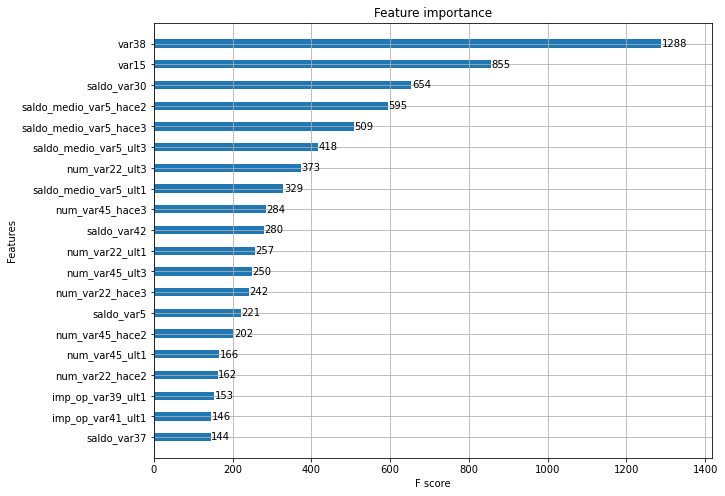

In [32]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

In [34]:
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_val, y_val)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_val, gridcv.predict_proba(X_val)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	val

[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc: 0.875873	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.140163
[30]	valid_0's auc: 0.876465	valid_0's binary_logloss: 0.123865	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.140195
[31]	valid_0's auc: 0.877699	valid_0's binary_logloss: 0.123521	valid_1's auc: 0.836229	valid_1's binary_logloss: 0.140186
[32]	valid_0's auc: 0.878492	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.140145
[33]	valid_0's auc: 0.879281	valid_0's binary_logloss: 0.122981	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.140165
[34]	valid_0's au

[11]	valid_0's auc: 0.85454	valid_0's binary_logloss: 0.133213	valid_1's auc: 0.838387	valid_1's binary_logloss: 0.143878
[12]	valid_0's auc: 0.856731	valid_0's binary_logloss: 0.1323	valid_1's auc: 0.83958	valid_1's binary_logloss: 0.143232
[13]	valid_0's auc: 0.85773	valid_0's binary_logloss: 0.131445	valid_1's auc: 0.840016	valid_1's binary_logloss: 0.142644
[14]	valid_0's auc: 0.859616	valid_0's binary_logloss: 0.130695	valid_1's auc: 0.839638	valid_1's binary_logloss: 0.142197
[15]	valid_0's auc: 0.86065	valid_0's binary_logloss: 0.130019	valid_1's auc: 0.839342	valid_1's binary_logloss: 0.141867
[16]	valid_0's auc: 0.861879	valid_0's binary_logloss: 0.129426	valid_1's auc: 0.839474	valid_1's binary_logloss: 0.141484
[17]	valid_0's auc: 0.86312	valid_0's binary_logloss: 0.128865	valid_1's auc: 0.838976	valid_1's binary_logloss: 0.141297
[18]	valid_0's auc: 0.864292	valid_0's binary_logloss: 0.128302	valid_1's auc: 0.839738	valid_1's binary_logloss: 0.140953
[19]	valid_0's auc: 0.8

[36]	valid_0's auc: 0.883941	valid_0's binary_logloss: 0.121532	valid_1's auc: 0.840858	valid_1's binary_logloss: 0.139284
[37]	valid_0's auc: 0.884407	valid_0's binary_logloss: 0.121308	valid_1's auc: 0.840641	valid_1's binary_logloss: 0.139325
[38]	valid_0's auc: 0.885324	valid_0's binary_logloss: 0.121016	valid_1's auc: 0.840498	valid_1's binary_logloss: 0.13934
[39]	valid_0's auc: 0.885824	valid_0's binary_logloss: 0.120794	valid_1's auc: 0.840244	valid_1's binary_logloss: 0.139346
[40]	valid_0's auc: 0.886492	valid_0's binary_logloss: 0.120515	valid_1's auc: 0.84003	valid_1's binary_logloss: 0.139395
[41]	valid_0's auc: 0.887212	valid_0's binary_logloss: 0.120235	valid_1's auc: 0.839933	valid_1's binary_logloss: 0.139397
[42]	valid_0's auc: 0.887679	valid_0's binary_logloss: 0.120004	valid_1's auc: 0.839795	valid_1's binary_logloss: 0.139391
[43]	valid_0's auc: 0.88855	valid_0's binary_logloss: 0.119787	valid_1's auc: 0.839567	valid_1's binary_logloss: 0.139426
[44]	valid_0's auc:

[42]	valid_0's auc: 0.885392	valid_0's binary_logloss: 0.120617	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.139624
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856101	valid_0's binary_logloss: 0.13225	valid_1's auc: 0.840855	valid_1's binary_logloss: 0.142715
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_loglos

[25]	valid_0's auc: 0.871628	valid_0's binary_logloss: 0.125118	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139768
[26]	valid_0's auc: 0.872816	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.139683
[27]	valid_0's auc: 0.873647	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139669
[28]	valid_0's auc: 0.874326	valid_0's binary_logloss: 0.124117	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.139635
[29]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.123826	valid_1's auc: 0.838037	valid_1's binary_logloss: 0.139565
[30]	valid_0's auc: 0.876092	valid_0's binary_logloss: 0.123541	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.139571
[31]	valid_0's auc: 0.877253	valid_0's binary_logloss: 0.123222	valid_1's auc: 0.838176	valid_1's binary_logloss: 0.139525
[32]	valid_0's auc: 0.877859	valid_0's binary_logloss: 0.122952	valid_1's auc: 0.837999	valid_1's binary_logloss: 0.139539
[33]	valid_0's au

[13]	valid_0's auc: 0.859425	valid_0's binary_logloss: 0.131314	valid_1's auc: 0.840426	valid_1's binary_logloss: 0.142719
[14]	valid_0's auc: 0.861454	valid_0's binary_logloss: 0.130495	valid_1's auc: 0.840751	valid_1's binary_logloss: 0.14226
[15]	valid_0's auc: 0.862973	valid_0's binary_logloss: 0.12978	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14183
[16]	valid_0's auc: 0.864608	valid_0's binary_logloss: 0.129092	valid_1's auc: 0.839958	valid_1's binary_logloss: 0.14153
[17]	valid_0's auc: 0.865394	valid_0's binary_logloss: 0.128538	valid_1's auc: 0.840045	valid_1's binary_logloss: 0.141215
[18]	valid_0's auc: 0.867204	valid_0's binary_logloss: 0.127947	valid_1's auc: 0.840498	valid_1's binary_logloss: 0.1409
[19]	valid_0's auc: 0.868095	valid_0's binary_logloss: 0.127461	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.14074
[20]	valid_0's auc: 0.86902	valid_0's binary_logloss: 0.126956	valid_1's auc: 0.840596	valid_1's binary_logloss: 0.140606
[21]	valid_0's auc: 0.869

[21]	valid_0's auc: 0.886758	valid_0's binary_logloss: 0.121199	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.1405
[22]	valid_0's auc: 0.888245	valid_0's binary_logloss: 0.120566	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.140423
[23]	valid_0's auc: 0.889287	valid_0's binary_logloss: 0.119999	valid_1's auc: 0.837039	valid_1's binary_logloss: 0.140319
[24]	valid_0's auc: 0.890242	valid_0's binary_logloss: 0.119535	valid_1's auc: 0.837226	valid_1's binary_logloss: 0.140192
[25]	valid_0's auc: 0.89128	valid_0's binary_logloss: 0.119025	valid_1's auc: 0.836975	valid_1's binary_logloss: 0.140152
[26]	valid_0's auc: 0.892936	valid_0's binary_logloss: 0.118515	valid_1's auc: 0.836466	valid_1's binary_logloss: 0.14011
[27]	valid_0's auc: 0.894014	valid_0's binary_logloss: 0.118046	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140163
[28]	valid_0's auc: 0.895806	valid_0's binary_logloss: 0.1175	valid_1's auc: 0.835987	valid_1's binary_logloss: 0.1401
[29]	valid_0's auc: 0.89

[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss: 0.139314	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.150218
[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_logloss: 0.146922
[8]	valid_0's auc: 0.864625	valid_0's binary_logloss: 0.133401	valid_1's auc: 0.838988	

[31]	valid_0's auc: 0.897359	valid_0's binary_logloss: 0.116601	valid_1's auc: 0.837136	valid_1's binary_logloss: 0.139894
[32]	valid_0's auc: 0.898643	valid_0's binary_logloss: 0.11607	valid_1's auc: 0.836864	valid_1's binary_logloss: 0.139923
[33]	valid_0's auc: 0.89992	valid_0's binary_logloss: 0.115645	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.139915
[34]	valid_0's auc: 0.900901	valid_0's binary_logloss: 0.115264	valid_1's auc: 0.836791	valid_1's binary_logloss: 0.139982
[35]	valid_0's auc: 0.901751	valid_0's binary_logloss: 0.114906	valid_1's auc: 0.836687	valid_1's binary_logloss: 0.139951
[36]	valid_0's auc: 0.903021	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.836623	valid_1's binary_logloss: 0.139976
[37]	valid_0's auc: 0.904251	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.139975
[38]	valid_0's auc: 0.90516	valid_0's binary_logloss: 0.113675	valid_1's auc: 0.837	valid_1's binary_logloss: 0.139923
[39]	valid_0's auc: 0.

[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_logloss: 0.145495	valid_1's auc: 0.831668	valid_1's binary_logloss: 0.155726
[4]	valid_0's auc: 0.85412	valid_0's binary_logloss: 0.142244	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.153013
[5]	valid_0's auc: 0.856985	valid_0's binary_logloss: 0.139541	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.150762
[6]	valid_0's auc: 0.860318	valid_0's binary_logloss: 0.137315	valid_1's auc: 0.834439	valid_1's binary_logloss: 0.148891
[7]	valid_0's auc: 0.862354	valid_0's binary_logloss: 0.135314	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.147306
[8]	valid_0's auc: 0.864507	valid_0's binary_logloss: 0.133588	valid_1's auc: 0.834413	

[21]	valid_0's auc: 0.887553	valid_0's binary_logloss: 0.121164	valid_1's auc: 0.834052	valid_1's binary_logloss: 0.141225
[22]	valid_0's auc: 0.88866	valid_0's binary_logloss: 0.120577	valid_1's auc: 0.834098	valid_1's binary_logloss: 0.141029
[23]	valid_0's auc: 0.889845	valid_0's binary_logloss: 0.11997	valid_1's auc: 0.833894	valid_1's binary_logloss: 0.140951
[24]	valid_0's auc: 0.890796	valid_0's binary_logloss: 0.119485	valid_1's auc: 0.83469	valid_1's binary_logloss: 0.140844
[25]	valid_0's auc: 0.89199	valid_0's binary_logloss: 0.118928	valid_1's auc: 0.833906	valid_1's binary_logloss: 0.140917
[26]	valid_0's auc: 0.893398	valid_0's binary_logloss: 0.118364	valid_1's auc: 0.834288	valid_1's binary_logloss: 0.140784
[27]	valid_0's auc: 0.894509	valid_0's binary_logloss: 0.117887	valid_1's auc: 0.834364	valid_1's binary_logloss: 0.140677
[28]	valid_0's auc: 0.895524	valid_0's binary_logloss: 0.117424	valid_1's auc: 0.834009	valid_1's binary_logloss: 0.140715
[29]	valid_0's auc: 

[11]	valid_0's auc: 0.868726	valid_0's binary_logloss: 0.12984	valid_1's auc: 0.838501	valid_1's binary_logloss: 0.143675
[12]	valid_0's auc: 0.871558	valid_0's binary_logloss: 0.128733	valid_1's auc: 0.838492	valid_1's binary_logloss: 0.143092
[13]	valid_0's auc: 0.873442	valid_0's binary_logloss: 0.127675	valid_1's auc: 0.839717	valid_1's binary_logloss: 0.142342
[14]	valid_0's auc: 0.875241	valid_0's binary_logloss: 0.126727	valid_1's auc: 0.839554	valid_1's binary_logloss: 0.141894
[15]	valid_0's auc: 0.877606	valid_0's binary_logloss: 0.125834	valid_1's auc: 0.839663	valid_1's binary_logloss: 0.141484
[16]	valid_0's auc: 0.878882	valid_0's binary_logloss: 0.125061	valid_1's auc: 0.840269	valid_1's binary_logloss: 0.141121
[17]	valid_0's auc: 0.88003	valid_0's binary_logloss: 0.124299	valid_1's auc: 0.840327	valid_1's binary_logloss: 0.140902
[18]	valid_0's auc: 0.881171	valid_0's binary_logloss: 0.123613	valid_1's auc: 0.839956	valid_1's binary_logloss: 0.14074
[19]	valid_0's auc:

[38]	valid_0's auc: 0.907	valid_0's binary_logloss: 0.112813	valid_1's auc: 0.840254	valid_1's binary_logloss: 0.139186
[39]	valid_0's auc: 0.907829	valid_0's binary_logloss: 0.112418	valid_1's auc: 0.84009	valid_1's binary_logloss: 0.139236
[40]	valid_0's auc: 0.908551	valid_0's binary_logloss: 0.112078	valid_1's auc: 0.839874	valid_1's binary_logloss: 0.139313
[41]	valid_0's auc: 0.909258	valid_0's binary_logloss: 0.111745	valid_1's auc: 0.839426	valid_1's binary_logloss: 0.139447
[42]	valid_0's auc: 0.909875	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.839809	valid_1's binary_logloss: 0.139428
[43]	valid_0's auc: 0.910434	valid_0's binary_logloss: 0.111052	valid_1's auc: 0.839618	valid_1's binary_logloss: 0.139483
[44]	valid_0's auc: 0.911375	valid_0's binary_logloss: 0.110624	valid_1's auc: 0.839582	valid_1's binary_logloss: 0.139519
[45]	valid_0's auc: 0.912055	valid_0's binary_logloss: 0.110372	valid_1's auc: 0.839536	valid_1's binary_logloss: 0.139546
[46]	valid_0's auc: 

[13]	valid_0's auc: 0.857763	valid_0's binary_logloss: 0.131837	valid_1's auc: 0.838486	valid_1's binary_logloss: 0.142774
[14]	valid_0's auc: 0.858818	valid_0's binary_logloss: 0.131136	valid_1's auc: 0.838246	valid_1's binary_logloss: 0.142334
[15]	valid_0's auc: 0.859873	valid_0's binary_logloss: 0.130476	valid_1's auc: 0.83747	valid_1's binary_logloss: 0.14209
[16]	valid_0's auc: 0.86059	valid_0's binary_logloss: 0.129898	valid_1's auc: 0.837199	valid_1's binary_logloss: 0.141785
[17]	valid_0's auc: 0.861469	valid_0's binary_logloss: 0.129391	valid_1's auc: 0.837392	valid_1's binary_logloss: 0.141489
[18]	valid_0's auc: 0.8626	valid_0's binary_logloss: 0.128887	valid_1's auc: 0.836967	valid_1's binary_logloss: 0.141321
[19]	valid_0's auc: 0.863942	valid_0's binary_logloss: 0.128362	valid_1's auc: 0.837273	valid_1's binary_logloss: 0.14108
[20]	valid_0's auc: 0.865345	valid_0's binary_logloss: 0.12787	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.140905
[21]	valid_0's auc: 0.8

[45]	valid_0's auc: 0.885417	valid_0's binary_logloss: 0.120493	valid_1's auc: 0.838678	valid_1's binary_logloss: 0.139288
[46]	valid_0's auc: 0.885803	valid_0's binary_logloss: 0.120327	valid_1's auc: 0.838716	valid_1's binary_logloss: 0.139279
[47]	valid_0's auc: 0.886486	valid_0's binary_logloss: 0.120099	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139274
[48]	valid_0's auc: 0.887253	valid_0's binary_logloss: 0.119903	valid_1's auc: 0.838451	valid_1's binary_logloss: 0.139321
[49]	valid_0's auc: 0.887742	valid_0's binary_logloss: 0.11971	valid_1's auc: 0.838484	valid_1's binary_logloss: 0.139332
[50]	valid_0's auc: 0.888224	valid_0's binary_logloss: 0.119543	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.139353
[51]	valid_0's auc: 0.888667	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.838246	valid_1's binary_logloss: 0.1394
Early stopping, best iteration is:
[21]	valid_0's auc: 0.867585	valid_0's binary_logloss: 0.127262	valid_1's auc: 0.839226	valid_1's binary_log

[25]	valid_0's auc: 0.871861	valid_0's binary_logloss: 0.125716	valid_1's auc: 0.842924	valid_1's binary_logloss: 0.139114
[26]	valid_0's auc: 0.872932	valid_0's binary_logloss: 0.125379	valid_1's auc: 0.842821	valid_1's binary_logloss: 0.139002
[27]	valid_0's auc: 0.873488	valid_0's binary_logloss: 0.125055	valid_1's auc: 0.842803	valid_1's binary_logloss: 0.138866
[28]	valid_0's auc: 0.874282	valid_0's binary_logloss: 0.124763	valid_1's auc: 0.842697	valid_1's binary_logloss: 0.138796
[29]	valid_0's auc: 0.875185	valid_0's binary_logloss: 0.124481	valid_1's auc: 0.843506	valid_1's binary_logloss: 0.138625
[30]	valid_0's auc: 0.875805	valid_0's binary_logloss: 0.124216	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.138532
[31]	valid_0's auc: 0.877289	valid_0's binary_logloss: 0.123898	valid_1's auc: 0.84385	valid_1's binary_logloss: 0.138455
[32]	valid_0's auc: 0.878137	valid_0's binary_logloss: 0.123613	valid_1's auc: 0.843943	valid_1's binary_logloss: 0.138401
[33]	valid_0's au

[14]	valid_0's auc: 0.859797	valid_0's binary_logloss: 0.130869	valid_1's auc: 0.839774	valid_1's binary_logloss: 0.141886
[15]	valid_0's auc: 0.860717	valid_0's binary_logloss: 0.130253	valid_1's auc: 0.839325	valid_1's binary_logloss: 0.141526
[16]	valid_0's auc: 0.861684	valid_0's binary_logloss: 0.12968	valid_1's auc: 0.839477	valid_1's binary_logloss: 0.141164
[17]	valid_0's auc: 0.863005	valid_0's binary_logloss: 0.129116	valid_1's auc: 0.839652	valid_1's binary_logloss: 0.140811
[18]	valid_0's auc: 0.864178	valid_0's binary_logloss: 0.128588	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.140551
[19]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.128091	valid_1's auc: 0.838928	valid_1's binary_logloss: 0.140383
[20]	valid_0's auc: 0.86641	valid_0's binary_logloss: 0.127645	valid_1's auc: 0.838283	valid_1's binary_logloss: 0.140237
[21]	valid_0's auc: 0.867294	valid_0's binary_logloss: 0.127271	valid_1's auc: 0.838068	valid_1's binary_logloss: 0.140114
[22]	valid_0's auc

[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logloss: 0.139881	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149202
[7]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.13816	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.147646
[8]	valid_0's auc: 0.850898	valid_0's binary_logloss: 0.136639	valid_1's auc: 0.838862	

[24]	valid_0's auc: 0.868511	valid_0's binary_logloss: 0.12652	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.13964
[25]	valid_0's auc: 0.869233	valid_0's binary_logloss: 0.126158	valid_1's auc: 0.840131	valid_1's binary_logloss: 0.139495
[26]	valid_0's auc: 0.870146	valid_0's binary_logloss: 0.12583	valid_1's auc: 0.839809	valid_1's binary_logloss: 0.139487
[27]	valid_0's auc: 0.871289	valid_0's binary_logloss: 0.125495	valid_1's auc: 0.83977	valid_1's binary_logloss: 0.139452
[28]	valid_0's auc: 0.872449	valid_0's binary_logloss: 0.125203	valid_1's auc: 0.839707	valid_1's binary_logloss: 0.139417
[29]	valid_0's auc: 0.87307	valid_0's binary_logloss: 0.124902	valid_1's auc: 0.840062	valid_1's binary_logloss: 0.13934
[30]	valid_0's auc: 0.874009	valid_0's binary_logloss: 0.124599	valid_1's auc: 0.839797	valid_1's binary_logloss: 0.139335
[31]	valid_0's auc: 0.874961	valid_0's binary_logloss: 0.124243	valid_1's auc: 0.839401	valid_1's binary_logloss: 0.139341
[32]	valid_0's auc: 0.

[57]	valid_0's auc: 0.893589	valid_0's binary_logloss: 0.118094	valid_1's auc: 0.844225	valid_1's binary_logloss: 0.138064
[58]	valid_0's auc: 0.89387	valid_0's binary_logloss: 0.117959	valid_1's auc: 0.844327	valid_1's binary_logloss: 0.138044
[59]	valid_0's auc: 0.894196	valid_0's binary_logloss: 0.117784	valid_1's auc: 0.844144	valid_1's binary_logloss: 0.138088
[60]	valid_0's auc: 0.894754	valid_0's binary_logloss: 0.117589	valid_1's auc: 0.843942	valid_1's binary_logloss: 0.138136
[61]	valid_0's auc: 0.895224	valid_0's binary_logloss: 0.117358	valid_1's auc: 0.844107	valid_1's binary_logloss: 0.138135
[62]	valid_0's auc: 0.895747	valid_0's binary_logloss: 0.117116	valid_1's auc: 0.844033	valid_1's binary_logloss: 0.138143
[63]	valid_0's auc: 0.896042	valid_0's binary_logloss: 0.116934	valid_1's auc: 0.844057	valid_1's binary_logloss: 0.138188
[64]	valid_0's auc: 0.89648	valid_0's binary_logloss: 0.116742	valid_1's auc: 0.843882	valid_1's binary_logloss: 0.138258
[65]	valid_0's auc

[11]	valid_0's auc: 0.869474	valid_0's binary_logloss: 0.130487	valid_1's auc: 0.837061	valid_1's binary_logloss: 0.143902
[12]	valid_0's auc: 0.871188	valid_0's binary_logloss: 0.12944	valid_1's auc: 0.83674	valid_1's binary_logloss: 0.14338
[13]	valid_0's auc: 0.873292	valid_0's binary_logloss: 0.128408	valid_1's auc: 0.835747	valid_1's binary_logloss: 0.142955
[14]	valid_0's auc: 0.875272	valid_0's binary_logloss: 0.127498	valid_1's auc: 0.83504	valid_1's binary_logloss: 0.142577
[15]	valid_0's auc: 0.876333	valid_0's binary_logloss: 0.126687	valid_1's auc: 0.835286	valid_1's binary_logloss: 0.142233
[16]	valid_0's auc: 0.878172	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.835135	valid_1's binary_logloss: 0.141915
[17]	valid_0's auc: 0.879493	valid_0's binary_logloss: 0.125166	valid_1's auc: 0.834462	valid_1's binary_logloss: 0.141684
[18]	valid_0's auc: 0.880697	valid_0's binary_logloss: 0.124485	valid_1's auc: 0.834855	valid_1's binary_logloss: 0.141381
[19]	valid_0's auc: 

[1]	valid_0's auc: 0.831709	valid_0's binary_logloss: 0.155602	valid_1's auc: 0.817142	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845013	valid_0's binary_logloss: 0.15006	valid_1's auc: 0.83132	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.847843	valid_0's binary_logloss: 0.145936	valid_1's auc: 0.833351	valid_1's binary_logloss: 0.155788
[4]	valid_0's auc: 0.853126	valid_0's binary_logloss: 0.142751	valid_1's auc: 0.836086	valid_1's binary_logloss: 0.152883
[5]	valid_0's auc: 0.855373	valid_0's binary_logloss: 0.140124	valid_1's auc: 0.836802	valid_1's binary_logloss: 0.150648
[6]	valid_0's auc: 0.858982	valid_0's binary_logloss: 0.137929	valid_1's auc: 0.837196	valid_1's binary_logloss: 0.148838
[7]	valid_0's auc: 0.860432	valid_0's binary_logloss: 0.136116	valid_1's auc: 0.8365	valid_1's binary_logloss: 0.147355
[8]	valid_0's auc: 0.86237	valid_0's binary_logloss: 0.134493	valid_1's auc: 0.836708	val

[17]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.125088	valid_1's auc: 0.837465	valid_1's binary_logloss: 0.1409
[18]	valid_0's auc: 0.880601	valid_0's binary_logloss: 0.124364	valid_1's auc: 0.837466	valid_1's binary_logloss: 0.140701
[19]	valid_0's auc: 0.88248	valid_0's binary_logloss: 0.123621	valid_1's auc: 0.838247	valid_1's binary_logloss: 0.140429
[20]	valid_0's auc: 0.883936	valid_0's binary_logloss: 0.122911	valid_1's auc: 0.83793	valid_1's binary_logloss: 0.140317
[21]	valid_0's auc: 0.88529	valid_0's binary_logloss: 0.122327	valid_1's auc: 0.838792	valid_1's binary_logloss: 0.140098
[22]	valid_0's auc: 0.88648	valid_0's binary_logloss: 0.121732	valid_1's auc: 0.838403	valid_1's binary_logloss: 0.139974
[23]	valid_0's auc: 0.887765	valid_0's binary_logloss: 0.121176	valid_1's auc: 0.838404	valid_1's binary_logloss: 0.139891
[24]	valid_0's auc: 0.888887	valid_0's binary_logloss: 0.120591	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.

[18]	valid_0's auc: 0.880333	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.14109
[19]	valid_0's auc: 0.881986	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.834979	valid_1's binary_logloss: 0.140974
[20]	valid_0's auc: 0.883497	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.834694	valid_1's binary_logloss: 0.140833
[21]	valid_0's auc: 0.88477	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.83413	valid_1's binary_logloss: 0.140756
[22]	valid_0's auc: 0.886052	valid_0's binary_logloss: 0.121963	valid_1's auc: 0.833448	valid_1's binary_logloss: 0.140744
[23]	valid_0's auc: 0.88729	valid_0's binary_logloss: 0.121374	valid_1's auc: 0.832949	valid_1's binary_logloss: 0.140705
[24]	valid_0's auc: 0.888202	valid_0's binary_logloss: 0.120845	valid_1's auc: 0.832423	valid_1's binary_logloss: 0.140716
[25]	valid_0's auc: 0.889261	valid_0's binary_logloss: 0.120276	valid_1's auc: 0.832717	valid_1's binary_logloss: 0.140524
[26]	valid_0's auc: 0

[9]	valid_0's auc: 0.866131	valid_0's binary_logloss: 0.132702	valid_1's auc: 0.837967	valid_1's binary_logloss: 0.144848
[10]	valid_0's auc: 0.867742	valid_0's binary_logloss: 0.1314	valid_1's auc: 0.837692	valid_1's binary_logloss: 0.143974
[11]	valid_0's auc: 0.869179	valid_0's binary_logloss: 0.130269	valid_1's auc: 0.837036	valid_1's binary_logloss: 0.143346
[12]	valid_0's auc: 0.870565	valid_0's binary_logloss: 0.129231	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.14276
[13]	valid_0's auc: 0.871715	valid_0's binary_logloss: 0.128325	valid_1's auc: 0.836964	valid_1's binary_logloss: 0.14221
[14]	valid_0's auc: 0.873118	valid_0's binary_logloss: 0.127433	valid_1's auc: 0.836616	valid_1's binary_logloss: 0.141769
[15]	valid_0's auc: 0.874777	valid_0's binary_logloss: 0.126525	valid_1's auc: 0.837268	valid_1's binary_logloss: 0.141352
[16]	valid_0's auc: 0.876077	valid_0's binary_logloss: 0.125761	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.141109
[17]	valid_0's auc: 0

[41]	valid_0's auc: 0.900934	valid_0's binary_logloss: 0.114813	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.139923
[42]	valid_0's auc: 0.901636	valid_0's binary_logloss: 0.114489	valid_1's auc: 0.836537	valid_1's binary_logloss: 0.140017
[43]	valid_0's auc: 0.90272	valid_0's binary_logloss: 0.114161	valid_1's auc: 0.836588	valid_1's binary_logloss: 0.140025
[44]	valid_0's auc: 0.903084	valid_0's binary_logloss: 0.113909	valid_1's auc: 0.836634	valid_1's binary_logloss: 0.140037
[45]	valid_0's auc: 0.903622	valid_0's binary_logloss: 0.113641	valid_1's auc: 0.83651	valid_1's binary_logloss: 0.140106
[46]	valid_0's auc: 0.904201	valid_0's binary_logloss: 0.113301	valid_1's auc: 0.83619	valid_1's binary_logloss: 0.140186
[47]	valid_0's auc: 0.904762	valid_0's binary_logloss: 0.112961	valid_1's auc: 0.836219	valid_1's binary_logloss: 0.14019
[48]	valid_0's auc: 0.905387	valid_0's binary_logloss: 0.11272	valid_1's auc: 0.836095	valid_1's binary_logloss: 0.140252
[49]	valid_0's auc: 0

[55]	valid_0's auc: 0.912616	valid_0's binary_logloss: 0.109226	valid_1's auc: 0.837936	valid_1's binary_logloss: 0.13983
[56]	valid_0's auc: 0.913202	valid_0's binary_logloss: 0.108936	valid_1's auc: 0.83804	valid_1's binary_logloss: 0.13983
[57]	valid_0's auc: 0.913592	valid_0's binary_logloss: 0.10867	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139818
[58]	valid_0's auc: 0.913818	valid_0's binary_logloss: 0.108421	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.139971
[59]	valid_0's auc: 0.914378	valid_0's binary_logloss: 0.108194	valid_1's auc: 0.837836	valid_1's binary_logloss: 0.139971
[60]	valid_0's auc: 0.91493	valid_0's binary_logloss: 0.107966	valid_1's auc: 0.837549	valid_1's binary_logloss: 0.140068
[61]	valid_0's auc: 0.915354	valid_0's binary_logloss: 0.107682	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.140197
[62]	valid_0's auc: 0.915606	valid_0's binary_logloss: 0.107477	valid_1's auc: 0.836606	valid_1's binary_logloss: 0.140336
[63]	valid_0's auc: 0

[13]	valid_0's auc: 0.858555	valid_0's binary_logloss: 0.13154	valid_1's auc: 0.83788	valid_1's binary_logloss: 0.142918
[14]	valid_0's auc: 0.859092	valid_0's binary_logloss: 0.130843	valid_1's auc: 0.837034	valid_1's binary_logloss: 0.142521
[15]	valid_0's auc: 0.860202	valid_0's binary_logloss: 0.130174	valid_1's auc: 0.836385	valid_1's binary_logloss: 0.142279
[16]	valid_0's auc: 0.861797	valid_0's binary_logloss: 0.129525	valid_1's auc: 0.835582	valid_1's binary_logloss: 0.141987
[17]	valid_0's auc: 0.863207	valid_0's binary_logloss: 0.128978	valid_1's auc: 0.835285	valid_1's binary_logloss: 0.141713
[18]	valid_0's auc: 0.864433	valid_0's binary_logloss: 0.128402	valid_1's auc: 0.835435	valid_1's binary_logloss: 0.141442
[19]	valid_0's auc: 0.865245	valid_0's binary_logloss: 0.127948	valid_1's auc: 0.836123	valid_1's binary_logloss: 0.1412
[20]	valid_0's auc: 0.866024	valid_0's binary_logloss: 0.127497	valid_1's auc: 0.83704	valid_1's binary_logloss: 0.140979
[21]	valid_0's auc: 0

[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.842374	valid_0's binary_logloss: 0.143993	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.153225
[5]	valid_0's auc: 0.845121	valid_0's binary_logloss: 0.141663	valid_1's auc: 0.835734	valid_1's binary_logloss: 0.15098
[6]	valid_0's auc: 0.846404	valid_0's binary_logloss: 0.139689	valid_1's auc: 0.83664	valid_1's binary_logloss: 0.14912
[7]	valid_0's auc: 0.848157	valid_0's binary_logloss: 0.137973	valid_1's auc: 0.836379	valid_1's binary_logloss: 0.147706
[8]	valid_0's auc: 0.84954	valid_0's binary_logloss: 0.136555	valid_1's auc: 0.836889	va

[23]	valid_0's auc: 0.872384	valid_0's binary_logloss: 0.125599	valid_1's auc: 0.840267	valid_1's binary_logloss: 0.14022
[24]	valid_0's auc: 0.873433	valid_0's binary_logloss: 0.125215	valid_1's auc: 0.840763	valid_1's binary_logloss: 0.140023
[25]	valid_0's auc: 0.874094	valid_0's binary_logloss: 0.124834	valid_1's auc: 0.840782	valid_1's binary_logloss: 0.139927
[26]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.12446	valid_1's auc: 0.840852	valid_1's binary_logloss: 0.139864
[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc: 0.878569	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.139479
[31]	valid_0's auc

[32]	valid_0's auc: 0.879609	valid_0's binary_logloss: 0.122982	valid_1's auc: 0.836481	valid_1's binary_logloss: 0.139632
[33]	valid_0's auc: 0.880297	valid_0's binary_logloss: 0.122728	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.139575
[34]	valid_0's auc: 0.881002	valid_0's binary_logloss: 0.122492	valid_1's auc: 0.836762	valid_1's binary_logloss: 0.139536
[35]	valid_0's auc: 0.881621	valid_0's binary_logloss: 0.122231	valid_1's auc: 0.836948	valid_1's binary_logloss: 0.139471
[36]	valid_0's auc: 0.882178	valid_0's binary_logloss: 0.121993	valid_1's auc: 0.83713	valid_1's binary_logloss: 0.139418
[37]	valid_0's auc: 0.882783	valid_0's binary_logloss: 0.121741	valid_1's auc: 0.837135	valid_1's binary_logloss: 0.139368
[38]	valid_0's auc: 0.88336	valid_0's binary_logloss: 0.121507	valid_1's auc: 0.836861	valid_1's binary_logloss: 0.139431
[39]	valid_0's auc: 0.883753	valid_0's binary_logloss: 0.121298	valid_1's auc: 0.836288	valid_1's binary_logloss: 0.139548
[40]	valid_0's auc: 

[20]	valid_0's auc: 0.865576	valid_0's binary_logloss: 0.127256	valid_1's auc: 0.838481	valid_1's binary_logloss: 0.140248
[21]	valid_0's auc: 0.866846	valid_0's binary_logloss: 0.126797	valid_1's auc: 0.838182	valid_1's binary_logloss: 0.140129
[22]	valid_0's auc: 0.86837	valid_0's binary_logloss: 0.126354	valid_1's auc: 0.838279	valid_1's binary_logloss: 0.139978
[23]	valid_0's auc: 0.869587	valid_0's binary_logloss: 0.125905	valid_1's auc: 0.83825	valid_1's binary_logloss: 0.139909
[24]	valid_0's auc: 0.870532	valid_0's binary_logloss: 0.125527	valid_1's auc: 0.838429	valid_1's binary_logloss: 0.139818
[25]	valid_0's auc: 0.871628	valid_0's binary_logloss: 0.125118	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139768
[26]	valid_0's auc: 0.872816	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.139683
[27]	valid_0's auc: 0.873647	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139669
[28]	valid_0's auc:

[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836251	valid_0's binary_logloss: 0.14724	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.156452
[4]	valid_0's auc: 0.842516	valid_0's binary_logloss: 0.144162	valid_1's auc: 0.832695	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.846316	valid_0's binary_logloss: 0.141636	valid_1's auc: 0.834705	valid_1's binary_logloss: 0.151246
[6]	valid_0's auc: 0.847998	valid_0's binary_logloss: 0.139517	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.149374
[7]	valid_0's auc: 0.849074	valid_0's binary_logloss: 0.13782	valid_1's auc: 0.838333	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.85	valid_0's binary_logloss: 0.136391	valid_1's auc: 0.838986	valid_

[10]	valid_0's auc: 0.867622	valid_0's binary_logloss: 0.130807	valid_1's auc: 0.835059	valid_1's binary_logloss: 0.144333
[11]	valid_0's auc: 0.869595	valid_0's binary_logloss: 0.12963	valid_1's auc: 0.835611	valid_1's binary_logloss: 0.143624
[12]	valid_0's auc: 0.871732	valid_0's binary_logloss: 0.128488	valid_1's auc: 0.837004	valid_1's binary_logloss: 0.142969
[13]	valid_0's auc: 0.874689	valid_0's binary_logloss: 0.127457	valid_1's auc: 0.837217	valid_1's binary_logloss: 0.142409
[14]	valid_0's auc: 0.876111	valid_0's binary_logloss: 0.126511	valid_1's auc: 0.837232	valid_1's binary_logloss: 0.141993
[15]	valid_0's auc: 0.87877	valid_0's binary_logloss: 0.12553	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.141557
[16]	valid_0's auc: 0.879918	valid_0's binary_logloss: 0.124701	valid_1's auc: 0.837709	valid_1's binary_logloss: 0.141283
[17]	valid_0's auc: 0.881444	valid_0's binary_logloss: 0.123911	valid_1's auc: 0.836877	valid_1's binary_logloss: 0.141158
[18]	valid_0's auc:

[32]	valid_0's auc: 0.90009	valid_0's binary_logloss: 0.115625	valid_1's auc: 0.83384	valid_1's binary_logloss: 0.140667
[33]	valid_0's auc: 0.901073	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.833911	valid_1's binary_logloss: 0.140619
[34]	valid_0's auc: 0.902228	valid_0's binary_logloss: 0.114803	valid_1's auc: 0.834049	valid_1's binary_logloss: 0.140595
[35]	valid_0's auc: 0.902949	valid_0's binary_logloss: 0.114411	valid_1's auc: 0.833465	valid_1's binary_logloss: 0.140641
[36]	valid_0's auc: 0.90428	valid_0's binary_logloss: 0.114027	valid_1's auc: 0.833146	valid_1's binary_logloss: 0.140714
[37]	valid_0's auc: 0.90518	valid_0's binary_logloss: 0.113632	valid_1's auc: 0.833423	valid_1's binary_logloss: 0.140663
[38]	valid_0's auc: 0.905995	valid_0's binary_logloss: 0.113243	valid_1's auc: 0.83347	valid_1's binary_logloss: 0.140755
Early stopping, best iteration is:
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	valid_1's binary_loglos

[18]	valid_0's auc: 0.881171	valid_0's binary_logloss: 0.123613	valid_1's auc: 0.839956	valid_1's binary_logloss: 0.14074
[19]	valid_0's auc: 0.882715	valid_0's binary_logloss: 0.12297	valid_1's auc: 0.839997	valid_1's binary_logloss: 0.140537
[20]	valid_0's auc: 0.884031	valid_0's binary_logloss: 0.122325	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.140381
[21]	valid_0's auc: 0.885764	valid_0's binary_logloss: 0.121625	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.140197
[22]	valid_0's auc: 0.887281	valid_0's binary_logloss: 0.120983	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.140102
[23]	valid_0's auc: 0.888433	valid_0's binary_logloss: 0.120453	valid_1's auc: 0.838981	valid_1's binary_logloss: 0.140039
[24]	valid_0's auc: 0.890216	valid_0's binary_logloss: 0.119857	valid_1's auc: 0.839006	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.891521	valid_0's binary_logloss: 0.119298	valid_1's auc: 0.83887	valid_1's binary_logloss: 0.139884
[26]	valid_0's auc:

[42]	valid_0's auc: 0.909875	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.839809	valid_1's binary_logloss: 0.139428
[43]	valid_0's auc: 0.910434	valid_0's binary_logloss: 0.111052	valid_1's auc: 0.839618	valid_1's binary_logloss: 0.139483
[44]	valid_0's auc: 0.911375	valid_0's binary_logloss: 0.110624	valid_1's auc: 0.839582	valid_1's binary_logloss: 0.139519
[45]	valid_0's auc: 0.912055	valid_0's binary_logloss: 0.110372	valid_1's auc: 0.839536	valid_1's binary_logloss: 0.139546
[46]	valid_0's auc: 0.912574	valid_0's binary_logloss: 0.110057	valid_1's auc: 0.83948	valid_1's binary_logloss: 0.139584
[47]	valid_0's auc: 0.91302	valid_0's binary_logloss: 0.109723	valid_1's auc: 0.839228	valid_1's binary_logloss: 0.139685
[48]	valid_0's auc: 0.913378	valid_0's binary_logloss: 0.109457	valid_1's auc: 0.839315	valid_1's binary_logloss: 0.139695
Early stopping, best iteration is:
[18]	valid_0's auc: 0.884494	valid_0's binary_logloss: 0.122936	valid_1's auc: 0.841739	valid_1's binary_l

[19]	valid_0's auc: 0.883566	valid_0's binary_logloss: 0.122594	valid_1's auc: 0.832707	valid_1's binary_logloss: 0.141615
[20]	valid_0's auc: 0.885585	valid_0's binary_logloss: 0.121869	valid_1's auc: 0.833151	valid_1's binary_logloss: 0.141426
[21]	valid_0's auc: 0.887553	valid_0's binary_logloss: 0.121164	valid_1's auc: 0.834052	valid_1's binary_logloss: 0.141225
[22]	valid_0's auc: 0.88866	valid_0's binary_logloss: 0.120577	valid_1's auc: 0.834098	valid_1's binary_logloss: 0.141029
[23]	valid_0's auc: 0.889845	valid_0's binary_logloss: 0.11997	valid_1's auc: 0.833894	valid_1's binary_logloss: 0.140951
[24]	valid_0's auc: 0.890796	valid_0's binary_logloss: 0.119485	valid_1's auc: 0.83469	valid_1's binary_logloss: 0.140844
[25]	valid_0's auc: 0.89199	valid_0's binary_logloss: 0.118928	valid_1's auc: 0.833906	valid_1's binary_logloss: 0.140917
[26]	valid_0's auc: 0.893398	valid_0's binary_logloss: 0.118364	valid_1's auc: 0.834288	valid_1's binary_logloss: 0.140784
[27]	valid_0's auc: 

[10]	valid_0's auc: 0.866663	valid_0's binary_logloss: 0.131026	valid_1's auc: 0.837673	valid_1's binary_logloss: 0.144419
[11]	valid_0's auc: 0.868726	valid_0's binary_logloss: 0.12984	valid_1's auc: 0.838501	valid_1's binary_logloss: 0.143675
[12]	valid_0's auc: 0.871558	valid_0's binary_logloss: 0.128733	valid_1's auc: 0.838492	valid_1's binary_logloss: 0.143092
[13]	valid_0's auc: 0.873442	valid_0's binary_logloss: 0.127675	valid_1's auc: 0.839717	valid_1's binary_logloss: 0.142342
[14]	valid_0's auc: 0.875241	valid_0's binary_logloss: 0.126727	valid_1's auc: 0.839554	valid_1's binary_logloss: 0.141894
[15]	valid_0's auc: 0.877606	valid_0's binary_logloss: 0.125834	valid_1's auc: 0.839663	valid_1's binary_logloss: 0.141484
[16]	valid_0's auc: 0.878882	valid_0's binary_logloss: 0.125061	valid_1's auc: 0.840269	valid_1's binary_logloss: 0.141121
[17]	valid_0's auc: 0.88003	valid_0's binary_logloss: 0.124299	valid_1's auc: 0.840327	valid_1's binary_logloss: 0.140902
[18]	valid_0's auc

[29]	valid_0's auc: 0.898028	valid_0's binary_logloss: 0.116618	valid_1's auc: 0.840857	valid_1's binary_logloss: 0.139136
[30]	valid_0's auc: 0.89908	valid_0's binary_logloss: 0.116142	valid_1's auc: 0.840827	valid_1's binary_logloss: 0.139074
[31]	valid_0's auc: 0.900145	valid_0's binary_logloss: 0.115699	valid_1's auc: 0.840974	valid_1's binary_logloss: 0.138987
[32]	valid_0's auc: 0.90112	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.139024
[33]	valid_0's auc: 0.901846	valid_0's binary_logloss: 0.114793	valid_1's auc: 0.840933	valid_1's binary_logloss: 0.13904
[34]	valid_0's auc: 0.902883	valid_0's binary_logloss: 0.114387	valid_1's auc: 0.840844	valid_1's binary_logloss: 0.139066
[35]	valid_0's auc: 0.903648	valid_0's binary_logloss: 0.113998	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.13901
[36]	valid_0's auc: 0.905129	valid_0's binary_logloss: 0.113587	valid_1's auc: 0.840769	valid_1's binary_logloss: 0.139037
[37]	valid_0's auc: 0

[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.14418	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.153682
[5]	valid_0's auc: 0.846745	valid_0's binary_logloss: 0.141793	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.151366
[6]	valid_0's auc: 0.849204	valid_0's binary_logloss: 0.139816	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.149412
[7]	valid_0's auc: 0.850163	valid_0's binary_logloss: 0.138129	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.147877
[8]	valid_0's auc: 0.852051	valid_0's binary_logloss: 0.136672	valid_1's auc: 0.838308	va

[26]	valid_0's auc: 0.871934	valid_0's binary_logloss: 0.12537	valid_1's auc: 0.838594	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873048	valid_0's binary_logloss: 0.125049	valid_1's auc: 0.83847	valid_1's binary_logloss: 0.139655
[28]	valid_0's auc: 0.873824	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.838229	valid_1's binary_logloss: 0.139655
[29]	valid_0's auc: 0.874662	valid_0's binary_logloss: 0.124467	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139579
[30]	valid_0's auc: 0.87542	valid_0's binary_logloss: 0.124168	valid_1's auc: 0.838156	valid_1's binary_logloss: 0.139548
[31]	valid_0's auc: 0.876207	valid_0's binary_logloss: 0.123915	valid_1's auc: 0.838237	valid_1's binary_logloss: 0.139538
[32]	valid_0's auc: 0.877156	valid_0's binary_logloss: 0.123623	valid_1's auc: 0.838271	valid_1's binary_logloss: 0.13947
[33]	valid_0's auc: 0.87768	valid_0's binary_logloss: 0.12338	valid_1's auc: 0.838713	valid_1's binary_logloss: 0.139346
[34]	valid_0's auc: 0.

[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	val

[74]	valid_0's auc: 0.899872	valid_0's binary_logloss: 0.115145	valid_1's auc: 0.843153	valid_1's binary_logloss: 0.138622
[75]	valid_0's auc: 0.900318	valid_0's binary_logloss: 0.115012	valid_1's auc: 0.8431	valid_1's binary_logloss: 0.138652
[76]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.114797	valid_1's auc: 0.843128	valid_1's binary_logloss: 0.138654
[77]	valid_0's auc: 0.901053	valid_0's binary_logloss: 0.11465	valid_1's auc: 0.843183	valid_1's binary_logloss: 0.138667
[78]	valid_0's auc: 0.901334	valid_0's binary_logloss: 0.114492	valid_1's auc: 0.843036	valid_1's binary_logloss: 0.138728
Early stopping, best iteration is:
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829817	valid_0's binary_log

[26]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.125636	valid_1's auc: 0.837504	valid_1's binary_logloss: 0.140165
[27]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.140044
[28]	valid_0's auc: 0.874041	valid_0's binary_logloss: 0.124866	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.14003
[29]	valid_0's auc: 0.875088	valid_0's binary_logloss: 0.12452	valid_1's auc: 0.837397	valid_1's binary_logloss: 0.140013
[30]	valid_0's auc: 0.876006	valid_0's binary_logloss: 0.124204	valid_1's auc: 0.837051	valid_1's binary_logloss: 0.140044
[31]	valid_0's auc: 0.876443	valid_0's binary_logloss: 0.123946	valid_1's auc: 0.837341	valid_1's binary_logloss: 0.139984
[32]	valid_0's auc: 0.877157	valid_0's binary_logloss: 0.123679	valid_1's auc: 0.837186	valid_1's binary_logloss: 0.139974
[33]	valid_0's auc: 0.877846	valid_0's binary_logloss: 0.123426	valid_1's auc: 0.836741	valid_1's binary_logloss: 0.140021
[34]	valid_0's auc

[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.83905

[24]	valid_0's auc: 0.871154	valid_0's binary_logloss: 0.126012	valid_1's auc: 0.842853	valid_1's binary_logloss: 0.139199
[25]	valid_0's auc: 0.871861	valid_0's binary_logloss: 0.125716	valid_1's auc: 0.842924	valid_1's binary_logloss: 0.139114
[26]	valid_0's auc: 0.872932	valid_0's binary_logloss: 0.125379	valid_1's auc: 0.842821	valid_1's binary_logloss: 0.139002
[27]	valid_0's auc: 0.873488	valid_0's binary_logloss: 0.125055	valid_1's auc: 0.842803	valid_1's binary_logloss: 0.138866
[28]	valid_0's auc: 0.874282	valid_0's binary_logloss: 0.124763	valid_1's auc: 0.842697	valid_1's binary_logloss: 0.138796
[29]	valid_0's auc: 0.875185	valid_0's binary_logloss: 0.124481	valid_1's auc: 0.843506	valid_1's binary_logloss: 0.138625
[30]	valid_0's auc: 0.875805	valid_0's binary_logloss: 0.124216	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.138532
[31]	valid_0's auc: 0.877289	valid_0's binary_logloss: 0.123898	valid_1's auc: 0.84385	valid_1's binary_logloss: 0.138455
[32]	valid_0's au

[18]	valid_0's auc: 0.880333	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.14109
[19]	valid_0's auc: 0.881986	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.834979	valid_1's binary_logloss: 0.140974
[20]	valid_0's auc: 0.883497	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.834694	valid_1's binary_logloss: 0.140833
[21]	valid_0's auc: 0.88477	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.83413	valid_1's binary_logloss: 0.140756
[22]	valid_0's auc: 0.886052	valid_0's binary_logloss: 0.121963	valid_1's auc: 0.833448	valid_1's binary_logloss: 0.140744
[23]	valid_0's auc: 0.88729	valid_0's binary_logloss: 0.121374	valid_1's auc: 0.832949	valid_1's binary_logloss: 0.140705
[24]	valid_0's auc: 0.888202	valid_0's binary_logloss: 0.120845	valid_1's auc: 0.832423	valid_1's binary_logloss: 0.140716
[25]	valid_0's auc: 0.889261	valid_0's binary_logloss: 0.120276	valid_1's auc: 0.832717	valid_1's binary_logloss: 0.140524
[26]	valid_0's auc: 0

[10]	valid_0's auc: 0.867742	valid_0's binary_logloss: 0.1314	valid_1's auc: 0.837692	valid_1's binary_logloss: 0.143974
[11]	valid_0's auc: 0.869179	valid_0's binary_logloss: 0.130269	valid_1's auc: 0.837036	valid_1's binary_logloss: 0.143346
[12]	valid_0's auc: 0.870565	valid_0's binary_logloss: 0.129231	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.14276
[13]	valid_0's auc: 0.871715	valid_0's binary_logloss: 0.128325	valid_1's auc: 0.836964	valid_1's binary_logloss: 0.14221
[14]	valid_0's auc: 0.873118	valid_0's binary_logloss: 0.127433	valid_1's auc: 0.836616	valid_1's binary_logloss: 0.141769
[15]	valid_0's auc: 0.874777	valid_0's binary_logloss: 0.126525	valid_1's auc: 0.837268	valid_1's binary_logloss: 0.141352
[16]	valid_0's auc: 0.876077	valid_0's binary_logloss: 0.125761	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.141109
[17]	valid_0's auc: 0.87775	valid_0's binary_logloss: 0.125008	valid_1's auc: 0.836212	valid_1's binary_logloss: 0.140988
[18]	valid_0's auc: 0

[45]	valid_0's auc: 0.903622	valid_0's binary_logloss: 0.113641	valid_1's auc: 0.83651	valid_1's binary_logloss: 0.140106
[46]	valid_0's auc: 0.904201	valid_0's binary_logloss: 0.113301	valid_1's auc: 0.83619	valid_1's binary_logloss: 0.140186
[47]	valid_0's auc: 0.904762	valid_0's binary_logloss: 0.112961	valid_1's auc: 0.836219	valid_1's binary_logloss: 0.14019
[48]	valid_0's auc: 0.905387	valid_0's binary_logloss: 0.11272	valid_1's auc: 0.836095	valid_1's binary_logloss: 0.140252
[49]	valid_0's auc: 0.90574	valid_0's binary_logloss: 0.112462	valid_1's auc: 0.835874	valid_1's binary_logloss: 0.140337
[50]	valid_0's auc: 0.906329	valid_0's binary_logloss: 0.112158	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140395
[51]	valid_0's auc: 0.906807	valid_0's binary_logloss: 0.111885	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140381
[52]	valid_0's auc: 0.907054	valid_0's binary_logloss: 0.111647	valid_1's auc: 0.835498	valid_1's binary_logloss: 0.14054
Early stopping, best i

[64]	valid_0's auc: 0.916522	valid_0's binary_logloss: 0.10698	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.140446
[65]	valid_0's auc: 0.917048	valid_0's binary_logloss: 0.106704	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.140528
[66]	valid_0's auc: 0.917714	valid_0's binary_logloss: 0.1065	valid_1's auc: 0.836017	valid_1's binary_logloss: 0.140589
[67]	valid_0's auc: 0.918245	valid_0's binary_logloss: 0.106235	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.140673
[68]	valid_0's auc: 0.918757	valid_0's binary_logloss: 0.105956	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.140696
[69]	valid_0's auc: 0.919319	valid_0's binary_logloss: 0.105704	valid_1's auc: 0.83538	valid_1's binary_logloss: 0.140788
[70]	valid_0's auc: 0.919498	valid_0's binary_logloss: 0.105505	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.140912
[71]	valid_0's auc: 0.919774	valid_0's binary_logloss: 0.105296	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.141016
Early stopping, best i

[18]	valid_0's auc: 0.880697	valid_0's binary_logloss: 0.124485	valid_1's auc: 0.834855	valid_1's binary_logloss: 0.141381
[19]	valid_0's auc: 0.881751	valid_0's binary_logloss: 0.123851	valid_1's auc: 0.83548	valid_1's binary_logloss: 0.141089
[20]	valid_0's auc: 0.883208	valid_0's binary_logloss: 0.123231	valid_1's auc: 0.834617	valid_1's binary_logloss: 0.141074
[21]	valid_0's auc: 0.884441	valid_0's binary_logloss: 0.122672	valid_1's auc: 0.835086	valid_1's binary_logloss: 0.140871
[22]	valid_0's auc: 0.885795	valid_0's binary_logloss: 0.122047	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.140833
[23]	valid_0's auc: 0.88703	valid_0's binary_logloss: 0.121437	valid_1's auc: 0.834867	valid_1's binary_logloss: 0.14067
[24]	valid_0's auc: 0.888628	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.834703	valid_1's binary_logloss: 0.140607
[25]	valid_0's auc: 0.889539	valid_0's binary_logloss: 0.120354	valid_1's auc: 0.834234	valid_1's binary_logloss: 0.140572
[26]	valid_0's auc:

[12]	valid_0's auc: 0.869423	valid_0's binary_logloss: 0.129754	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.142609
[13]	valid_0's auc: 0.870621	valid_0's binary_logloss: 0.128815	valid_1's auc: 0.838873	valid_1's binary_logloss: 0.142215
[14]	valid_0's auc: 0.871813	valid_0's binary_logloss: 0.128007	valid_1's auc: 0.83922	valid_1's binary_logloss: 0.141872
[15]	valid_0's auc: 0.873349	valid_0's binary_logloss: 0.127226	valid_1's auc: 0.838558	valid_1's binary_logloss: 0.141577
[16]	valid_0's auc: 0.875071	valid_0's binary_logloss: 0.126463	valid_1's auc: 0.838328	valid_1's binary_logloss: 0.141336
[17]	valid_0's auc: 0.87671	valid_0's binary_logloss: 0.125734	valid_1's auc: 0.838859	valid_1's binary_logloss: 0.140993
[18]	valid_0's auc: 0.877745	valid_0's binary_logloss: 0.12506	valid_1's auc: 0.838826	valid_1's binary_logloss: 0.140774
[19]	valid_0's auc: 0.87955	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.838685	valid_1's binary_logloss: 0.14062
[20]	valid_0's auc: 0

[28]	valid_0's auc: 0.893116	valid_0's binary_logloss: 0.118639	valid_1's auc: 0.838654	valid_1's binary_logloss: 0.139723
[29]	valid_0's auc: 0.894065	valid_0's binary_logloss: 0.118191	valid_1's auc: 0.83815	valid_1's binary_logloss: 0.13979
[30]	valid_0's auc: 0.895189	valid_0's binary_logloss: 0.117742	valid_1's auc: 0.838393	valid_1's binary_logloss: 0.139755
[31]	valid_0's auc: 0.896336	valid_0's binary_logloss: 0.117289	valid_1's auc: 0.838384	valid_1's binary_logloss: 0.139687
[32]	valid_0's auc: 0.897473	valid_0's binary_logloss: 0.116901	valid_1's auc: 0.838447	valid_1's binary_logloss: 0.139683
[33]	valid_0's auc: 0.898375	valid_0's binary_logloss: 0.116464	valid_1's auc: 0.838512	valid_1's binary_logloss: 0.139636
[34]	valid_0's auc: 0.899242	valid_0's binary_logloss: 0.116054	valid_1's auc: 0.838475	valid_1's binary_logloss: 0.139614
[35]	valid_0's auc: 0.900316	valid_0's binary_logloss: 0.115653	valid_1's auc: 0.838522	valid_1's binary_logloss: 0.13957
[36]	valid_0's auc:

[27]	training's auc: 0.879418	training's binary_logloss: 0.12344	valid_1's auc: 0.840793	valid_1's binary_logloss: 0.13942
[28]	training's auc: 0.880391	training's binary_logloss: 0.123097	valid_1's auc: 0.840479	valid_1's binary_logloss: 0.139408
[29]	training's auc: 0.8814	training's binary_logloss: 0.122748	valid_1's auc: 0.841327	valid_1's binary_logloss: 0.139219
[30]	training's auc: 0.882664	training's binary_logloss: 0.122385	valid_1's auc: 0.841785	valid_1's binary_logloss: 0.139112
[31]	training's auc: 0.883641	training's binary_logloss: 0.122039	valid_1's auc: 0.841598	valid_1's binary_logloss: 0.139065
[32]	training's auc: 0.88499	training's binary_logloss: 0.121694	valid_1's auc: 0.841465	valid_1's binary_logloss: 0.139091
[33]	training's auc: 0.886051	training's binary_logloss: 0.121395	valid_1's auc: 0.841002	valid_1's binary_logloss: 0.139073
[34]	training's auc: 0.8868	training's binary_logloss: 0.121118	valid_1's auc: 0.840943	valid_1's binary_logloss: 0.139069
[35]	tr

In [35]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=60,
                          max_depth=128)

evals = [(X_val, y_val)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.816534	valid_0's binary_logloss: 0.165167
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81932	valid_0's binary_logloss: 0.160019
[3]	valid_0's auc: 0.827935	valid_0's binary_logloss: 0.156362
[4]	valid_0's auc: 0.833269	valid_0's binary_logloss: 0.153469
[5]	valid_0's auc: 0.83486	valid_0's binary_logloss: 0.151262
[6]	valid_0's auc: 0.836656	valid_0's binary_logloss: 0.149439
[7]	valid_0's auc: 0.838769	valid_0's binary_logloss: 0.147844
[8]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.146502
[9]	valid_0's auc: 0.839985	valid_0's binary_logloss: 0.145462
[10]	valid_0's auc: 0.8401	valid_0's binary_logloss: 0.144512
[11]	valid_0's auc: 0.840377	valid_0's binary_logloss: 0.14369
[12]	valid_0's auc: 0.840823	valid_0's binary_logloss: 0.143055
[13]	valid_0's auc: 0.840551	valid_0's binary_logloss: 0.142537
[14]	valid_0's auc: 0.8399	valid_0's binary_logloss: 0.142111
[15]	va